In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv("bank.csv", sep=';')




In [22]:
df = df.dropna()
df_encoded = pd.get_dummies(df, drop_first=True)




In [23]:
scaler = StandardScaler()
scaled = scaler.fit_transform(df_encoded)




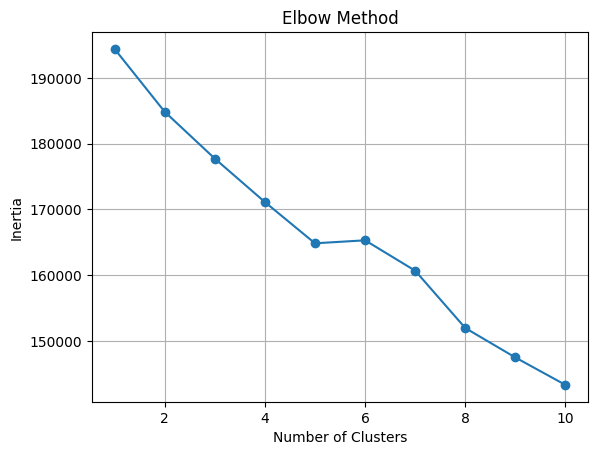

In [24]:
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()


In [25]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(scaled)
df_encoded['Cluster'] = kmeans.labels_




In [26]:
cluster_summary = df_encoded.groupby('Cluster').mean(numeric_only=True)
print(cluster_summary)

print(df_encoded['Cluster'].value_counts())





               age      balance        day    duration  campaign      pdays  \
Cluster                                                                       
0        43.332265  1321.219551  16.533120  272.612179  2.832265  71.477564   
1        39.972163  1196.566024  14.912206  259.159172  2.645967  -1.000000   
2        39.271635  1828.625000  16.114583  256.375801  2.901442  37.964744   

         previous  job_blue-collar  job_entrepreneur  job_housemaid  ...  \
Cluster                                                              ...   
0        0.917201         0.229701          0.033120       0.035256  ...   
1        0.000000         0.365453          0.037116       0.019272  ...   
2        0.589744         0.003205          0.043269       0.015224  ...   

         month_jun  month_mar  month_may  month_nov  month_oct  month_sep  \
Cluster                                                                     
0         0.012821   0.015491   0.110577   0.121261   0.029380   0.01

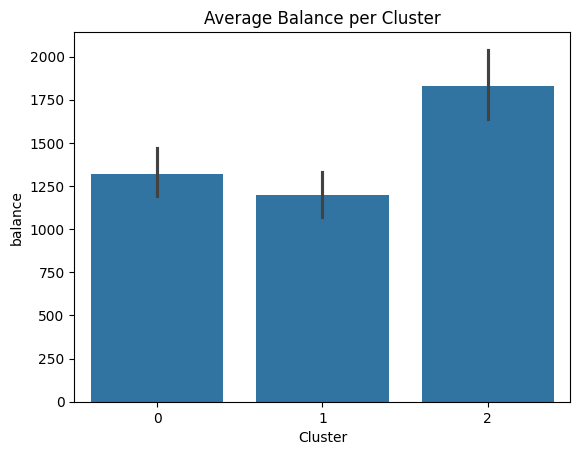

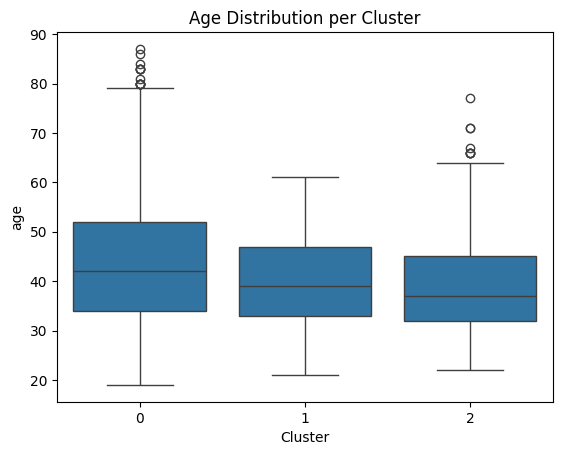

In [27]:
sns.barplot(x='Cluster', y='balance', data=df_encoded)
plt.title("Average Balance per Cluster")
plt.show()

sns.boxplot(x='Cluster', y='age', data=df_encoded)
plt.title("Age Distribution per Cluster")
plt.show()



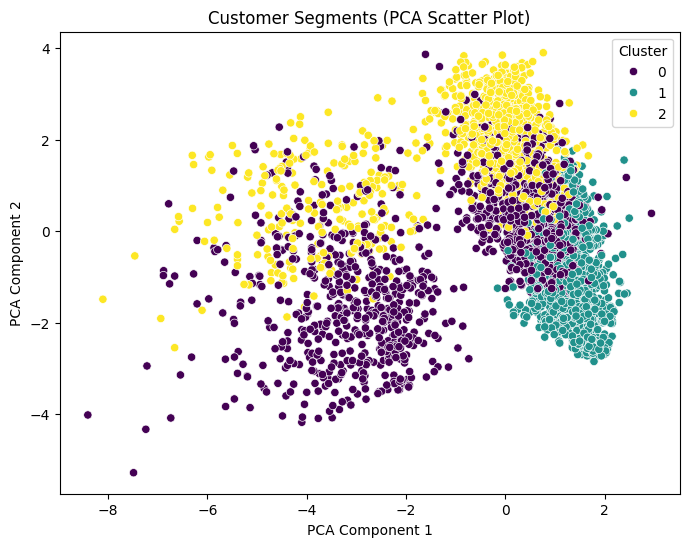

In [28]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled)

df_encoded['PCA1'] = pca_components[:, 0]
df_encoded['PCA2'] = pca_components[:, 1]

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_encoded, x='PCA1', y='PCA2', hue='Cluster', palette='viridis')
plt.title("Customer Segments (PCA Scatter Plot)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title='Cluster')
plt.show()
